In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()

# Math libraries
import numpy as np
import matplotlib.pyplot as plt

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Post Goals</font></h1></center>    
    <ol>
        <li><a href="#objective1">Provide an Introduction to Logistic Regression.</a></li><br>
        <li><a href="#objective2">Demonstrate How Logistic Regression Estimates Probabilities.</a></li><br>
        <li><a href="#objective3">Discuss Training and Cost Function.</a></li><br>
        <li><a href="#objective4">Demonstrate how to conduct Logistic Regression using Python Sklearn.</a></li><br>
        <li><a href="#objective5">Demonstrate how to use Decision Boundaries in Logistic Regressions.</a></li><br>        
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Part 1: Provide an Introduction to Logistic Regression.</strong></h1></center>
    <ul>
        <li><mark>Logistic regression is regression algorithm that can be used for classification problems.</mark></li><br>        
        <li>Logistic regression is also known as <em>Logit Regression</em></li><br>
<li>There are three major types of logistic regression:
    <ul>
        <li><em>Binomial Logistic Regression</em>: there are only two possible outcomes (yes/no, cat 1 or cat 2).</li>
        <li><em>Multinomial Logistic Regression</em>: there are three or more possible outcomes without order. Example: planet, start, comet</li>
        <li><em>Ordinal Logistic Regression</em>: there are three or more possible outcomes with ordering. Example: movie ratings from boring, okay, good, great.</li>         
    </ul>       
        <li>The focus of this post is the binomial logistic regression</li><br>
        <li><mark>Binomial Logistic regression is used to explain the relationship between a dependent binary variable and one or more continuous or categorical data (nominal, ordinal, interval, or ratio-level) independent variables.</mark></li><br>
        <li><strong>In other words: </strong>Binomial Logistic regression is used to estimate the probability that an instance belongs to a specific class.  Does the observation fall into one of two categories?</li><br>
        <li>A decision boundary is used to set a threshold for prediction making.  For binary classification, if an instance is less than 50%, it is classified in one category, and if is greater or equal to 50%, it is classified in the 2nd cagetory.</li><br>  
        <li>Decision boundaries can be linear or non-linear. Polynomial order can be increased to get a more complex decision boundary</li><br>
        <li>Example of logistic regression problems:
            <ul>
                <li>What is the probability that email is spam? (spam/ not spam)</li>
                <li>What is the probability that transaction is fraud? (yes/no)</li>
            <li>What is the probability that this tissue sample is cancerous? (yes/no)</li> 
            </ul></li><br>
        <li>Instances greater than 50% are labeled positive class, "1" .</li><br>
        <li>Instances less than 50% are labeled negative class, "0".</li><br>      
        <li><strong>Major Assumptions</strong></li><br>
        <ol>
        <li>Dependent variable should be dichotomous in nature (yes/no, present/absent, male/female etc).  If your dependent variable is continuous, you need to carry out a multiple regression analysis instead.  If the dependent variable is measu<br>red on an ordinal scale, use an ordinal regression.</li><br>
        <li>Data should have no outliers in the data. To omit outlier data, the continuous predictor data should be converted to standarized scores, and values below -3.29 and greater than 3.29 should be removed.</li><br>
        <li>You have one or more independent variables which can be either continuous (interval, ratio), or categorical (ordinal, nominal).</li><br>
        <li>No high association between independent variables. A correlation matrix should be used among predictors and if the long correlation coefficients among independent variables are less than 0.90, then those features are okay, otherwise omit.</li><br>
       <li>Independent observations and dependent variables should have mutually exclusive and exhaustive categories.</li><br>
    <li>There needs to be a linear relationship between any of the continous independent variables and the logit transformation of the dependent variable.  The Box-Tidwell (1967) procedure can be used to test for linearity.</li>
        </ol>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Part 2: Demonstrate How Logistic Regression Estimates Probabilities.</strong></h1></center>
    <ul>
        <li>Logistic regression models compute a weighted sum for all the features and adds a bias term.</li><br>
        <li>Unlike linear regression models that then output the result directly, logistic regression outputs the <strong><em>logistic</em></strong> of the result.</li><br>        
        <li><a href="#image1">Equation 1: </a>The vectorized form for the model estimated probability can be viewed below.</li><br>
        <li><a href="#image2">Equation 2: </a>The logistic model is a sigmoid function that outputs a number between 0 and 1. <a href="#image3">Sigmoid Function</a></li><br>        
        <li>Once the probability of p&#770; has been estimated that an instance of <strong>x</strong> belongs to the positive class, then a prediction can be made using the <a href="#image4">Logistic Regression Model Precition Equation</a>.</li><br>
        <li>Note on <a href="#image3">Logistic Function</a>:
            <ul><br>
                <li>When &sigma;(<em>t</em>) &#60; 0.5, Then <em>t</em> &#60; 0 <br>And p&#770; is 0 when <em>t</em> is negative.</li><br>
                <li>When &sigma;(<em>t</em>) &#62;= 0.5, Then <em>t</em> &#62;= 0 <br>And p&#770; is 1 when <em>t</em> positive.</li>             
            </ul>
        </li><br>
        <li>The <em>t</em> score is called the <em>logit</em> because it is the inverse of the logistic function.</li><br>
        <li>You will get <em>t</em> if you compute the logit of the estimated probability <em>p</em>.</li><br>
        <li>The logit is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class. Because of this, it is also called the <em>log-odds</em></li><br>
    </ul>
</div>

<div id="image1">
</div>

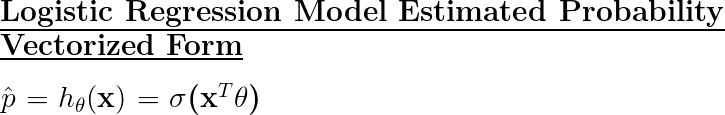

In [3]:
img = os.path.join(path, 'static/images/log_reg_est_prob_vec_form.png')
Image(filename=img) 

<div id="image2">
</div>

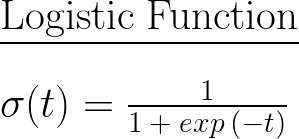

In [4]:
# to load images 
img = os.path.join(path, 'static/images/logistic_function_equation.png')
Image(filename=img) 

<div id="image3">
</div>

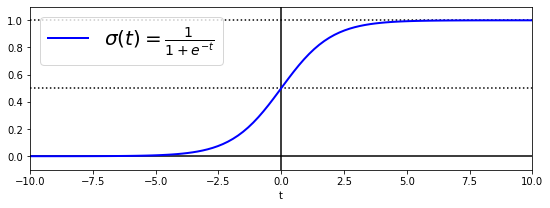

In [5]:
# visualize a sigmoid function
t = np.linspace(-10, 10, 100) # Return evenly spaced numbers over a specified interval.
sig = 1 / (1 + np.exp(-t)) # the sigmoid function
plt.figure(figsize=(9, 3)) # instantiates a figure object
plt.plot([-10, 10], [0, 0], "k-") # adds line
plt.plot([-10, 10], [0.5, 0.5], "k:") # adds line
plt.plot([-10, 10], [1, 1], "k:") # adds line
plt.plot([0, 0], [-1.1, 1.1], "k-") # adds line

# plot the sigmoid function
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t") # x axis label
plt.legend(loc="upper left", fontsize=20) # adds legend
plt.axis([-10, 10, -0.1, 1.1]) #sets the axis boundaries
#save_fig("logistic_function_plot")
plt.show()

<div id="image4">
</div>

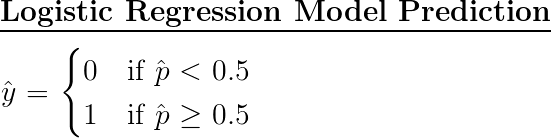

In [6]:
# to load images 
img = os.path.join(path, 'static/images/logreg_model_prediction.png')
Image(filename=img) 

<hr style="border-top: 5px solid black;">

<div id="objective3" style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Part 3: Discuss Training and Cost Function.</strong></h1></center>
    <ul>
        <li>The objective of training is to set the parameter vector &theta; so that the model estimates high probabilities for instances that are positive y=1, and low probabilities for instances that are negative (y=0).</li><br>
        <li><a href="#image4">Equation: Cost function of a single training instance.</a> This equations demonstrates the cost function during training of a single instance.</li><br>        
        <li>
            <ul>
                <li>When <em>t</em> &#60; 0<br> -log(t) grows very large<br>Then the cost function will be large if the model estimates a probability close to 0 for <strong>positive instances</strong> and when the model estimates a probability close to 1 for <strong>negative instances</strong>.
                </li><br>
                <li>When <em>t</em> is close to <strong>1</strong><br> -log(t) approaches <strong>0</strong><br> if the estimates probability is close to <strong>0</strong> for <strong>negative instances</strong> or close to 1 for <strong>positive instances</strong>.
                </li><br>                             
            </ul>
        </li><br>
        <li><a href="#image5">Equation: Log Loss, Logistic Regression Cost Function</a> The cost function for the whole traning set is the average cost for each instance.</li><br>
        <li>The cost function is convex and Gradient Descent is guranteed to find the global minimum.</li><br>
        <li><a href="#image6">Equation: Logistic cost function partial derivatives</a> for each instance the predicted error is multiplied by the jth feature value, and it then computes the average over the entire training set.</li><br>
        <li>The gradient vector can then be used on Gradient Descent.</li><br>
    </ul>
</div>

<div id="image4">
</div>

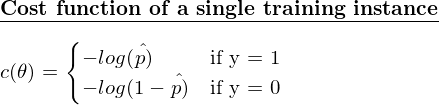

In [7]:
# to load images 
img = os.path.join(path, 'static/images/cost_func_sng_t_ins.png')
Image(filename=img) 

<div id="image5">
</div>

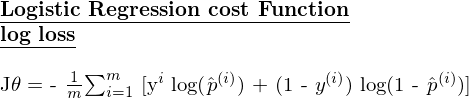

In [8]:
# to load images 
img = os.path.join(path, 'static/images/logreg_cost_function.png')
Image(filename=img) 

<div id="image6">
</div>

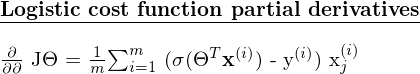

In [9]:
# to load images 
img = os.path.join(path, 'static/images/log_costfunc_part_der.png')
Image(filename=img) 

<hr style="border-top: 5px solid black;">

<div id="objective3" style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Part 4: Demonstrate How to Conduct Logistic Regression using Python Sklearn.</strong></h1></center>
    <ul>
        <li><a href"https://scikit-learn.org/stable/datasets/toy_dataset.html">Sklearn Documentation as of 2/12/21</a></li><br>        
        <li>Data for this project is obtained from Sklearn datset library</li><br>
        <li>The iris dataset is a classic and very easy multi-class classification dataset.</li><br>
        <li>In this example we will use the data to detect a class of flower based on petal length and petal width. The goal is to detect <a href="#image7">Iris-Virginica</a> from the other 2 classes.</li><br>
        <li>Iris Dataset
            <ul>
                <li><strong>Classes:</strong> 3</li>
                <li><strong>Samples per class:</strong> 50</li>   
                <li><strong>Sample total:</strong> 150</li> 
                <li><strong>Dimensions:</strong> 4</li>
            </ul></li><br>
        <li>The Sklearn Logistic Regression library will be used in this post.</li><br>
        <li><a href"https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Documentation as of 2/12/21</a></li><br>
    </ul>
</div>

<div id="image7">
</div>

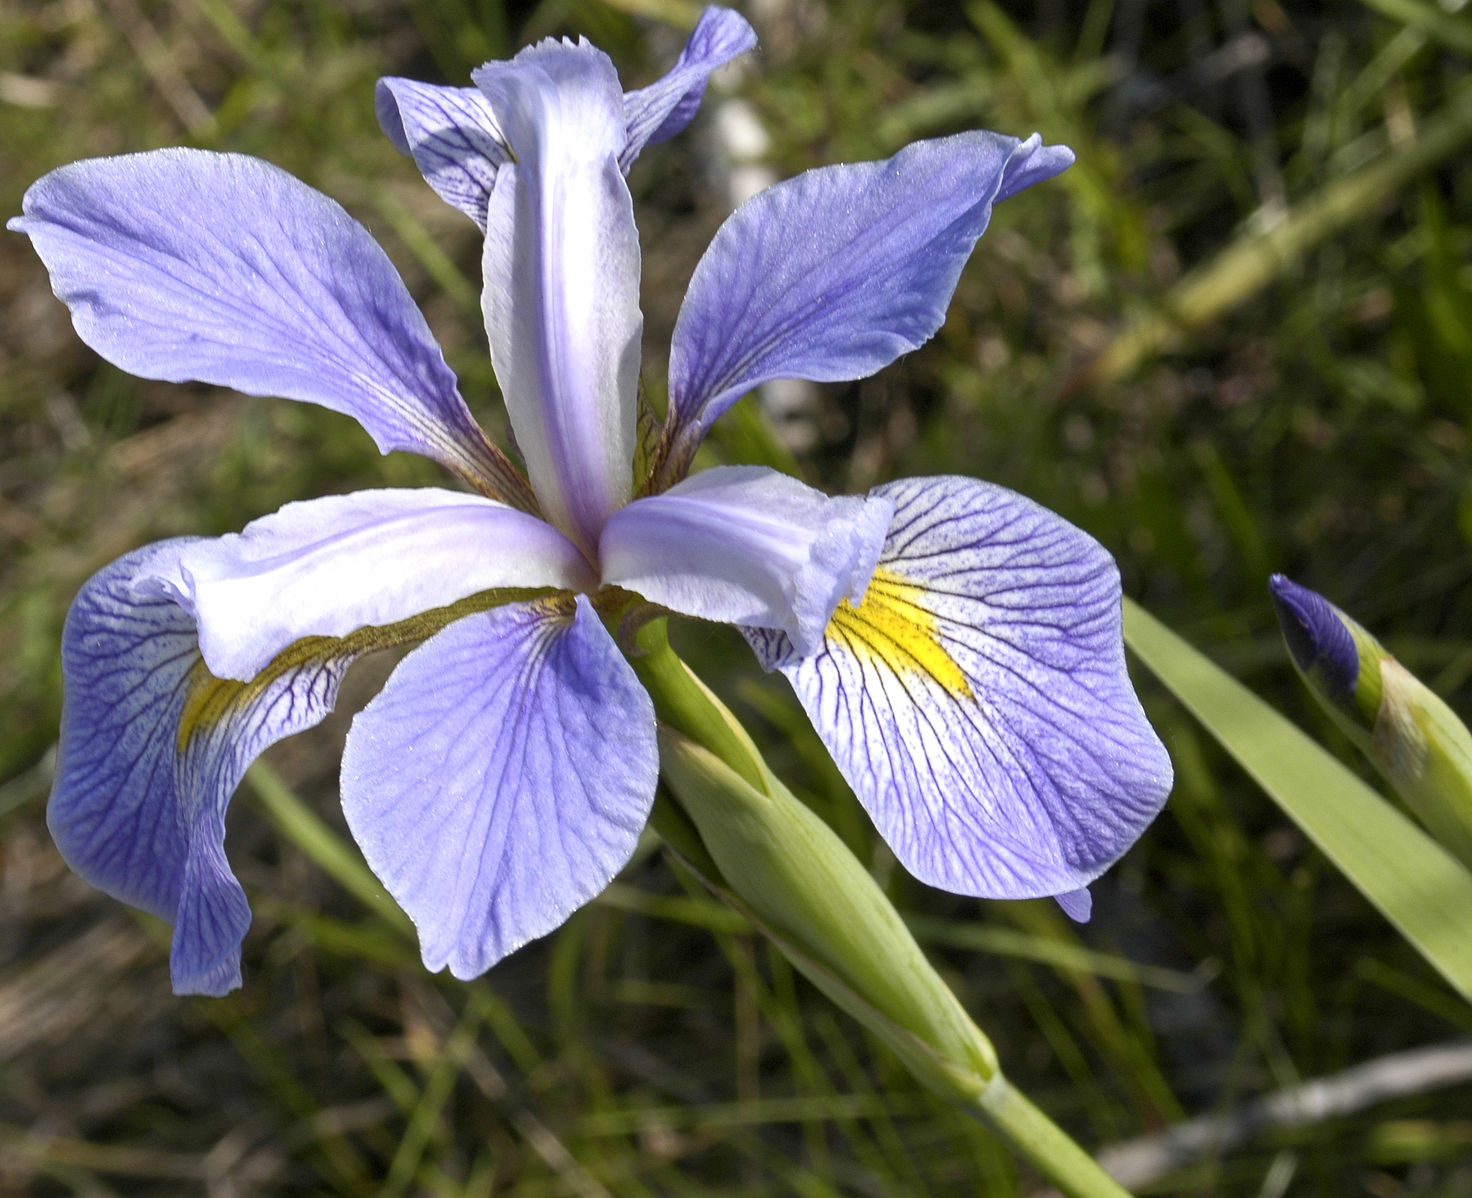

In [10]:
# to load images 
img = os.path.join(path, 'static/images/Iris_virginica.jpg')
Image(filename=img) 

<h2>Load Data</h2>

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

<h2>Train the Logistic Regression Model</h2>

In [12]:
# Assign data to dependent and independent variables 
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

<h2>Visualize the Model's Estimated Probabilities</h2>

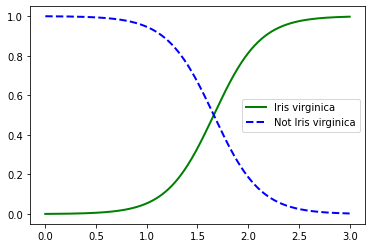

In [14]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()
plt.show()

In [15]:
# make predictions
two_tests = log_reg.predict([[1.7], [1.5]])
print(f'The examples tests the lengths of two flowers\nFlower 1 is 1.7 length and the model predicts this falls in class {two_tests[0]}\nFlower 2 is 1.5 in length and the model predicts this falls in class {two_tests[1]}')

The examples tests the lengths of two flowers
Flower 1 is 1.7 length and the model predicts this falls in class 1
Flower 2 is 1.5 in length and the model predicts this falls in class 0


<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Comments:</strong></h1></center>
    <ul>
        <li>In this example, we see that those classified as Iris Virginica have petal lengths greater than 1.6 while those that are not are smaller than this length.</li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective3" style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Part 5: Demonstrate How to Use Decision Boundaries in Logistic Regressions.</strong></h1></center>
    <ul>
        <li>A fundamental property of logestic regression is the decision bondary.</li><br>
        <li>The decision boundary creates a cutoff for when one class begins, and the other begins.</li><br>
        <li>Decisions boundaries can be linear, non-linear, and polynomial decision boundaries can be developed to more complex models.</li><br>
        <li>Two decision boundaries are used blow.<li>
        <li>A decision boundary using the <a href="#image8"><code>predict_proba()</code></a> method.</li><br>
        <li>A decision boundary displaying two features <a href="#image9">petal width and petal length</a>.</li><br>
    </ul>
</div>

<div id="image8">
</div>

/Users/trinidadcisneros/.pyenv/versions/3.8.2/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


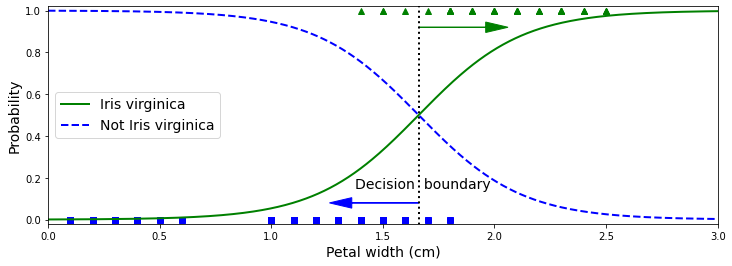

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Comments on Decision Boundary using <code>predict_proba()</code> method</strong></h1></center>
    <ul>
        <li>The Iris-Virginica flowers are represented in green line and the green triangles while all other flowers are represented in the blue line and blue squares.</li><br>
        <li>The decision boundary is indicated in a vertical horizontal line around 1.6 cm.</li><br>
        <li>The decision boundary occurs where the probability is 0.5.</li><br>
        <li>The confidence in the prediction increases as it moves away from the decision boundar.</li><br>        
    </ul>
</div>

<div id="image9">
</div>

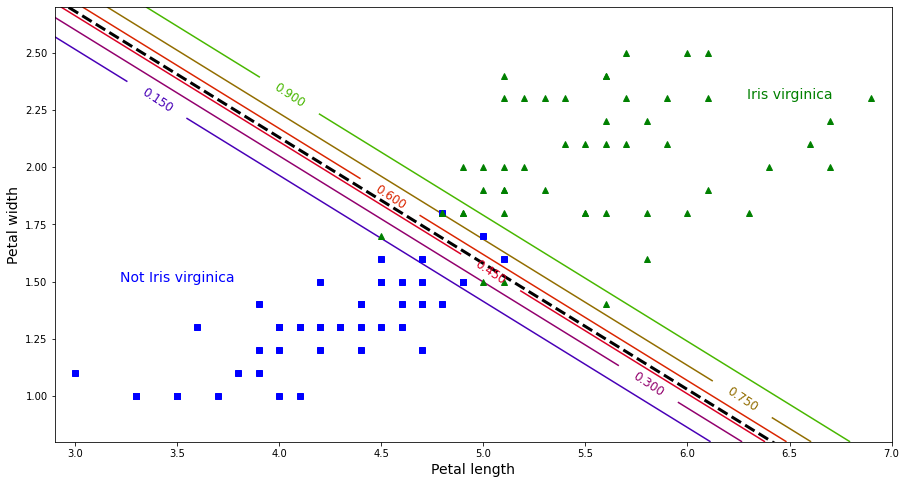

In [17]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Comments on Decision Boundary using Petal Length and Petal Width.</strong></h1></center>
    <ul>
        <li>The model is able to predict whether a flower is Iris virginica or other based on the length of the petal width and lenth.</li><br>
        <li>The dashed lines represent various probabilities, with the 50% decision boundary in black.</li><br>
        <li>All instances above the green line have a 90% probability of being Iris-Virginica.</li><br>      
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><strong>Concluding Remarks.</strong></h1></center>
    <ul>
 <li><mark>Logistic regression is regression algorithm that can be used for classification problems.</mark></li><br>
        <li>Several assumptions must be met before this model can be used to predict a class</li><br>
         <li>The decision boundary creates a cutoff for when one class begins, and the other begins.</li><br>
 <li>Decision boundaries can be linear or non-linear. Polynomial order can be increased to get a more complex decision boundary</li><br>
        <li>Logistic regression is a powerful tool that can be used to classify multinomial, and ordered data</li>
    </ul>
</div>